<a href="https://colab.research.google.com/github/Prasukj7-arch/MediCheck/blob/resnet50-model/Medical_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!pip install torch torchvision

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarsh0120","key":"fa2d547a092cdf99eb59d489cf24b886"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip -o skin-cancer-mnist-ham10000.zip -d ham10000_full

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_full/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_full/ham10000_images_part_2/IS

In [ ]:
import pandas as pd

metadata = pd.read_csv('ham10000_full/HAM10000_metadata.csv')
print(metadata.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [ ]:
import os

# Combining folders and data cleaning
image_folders = ['ham10000_full/HAM10000_images_part_1', 'ham10000_full/HAM10000_images_part_2']
all_images = {}
for folder in image_folders:
    for fname in os.listdir(folder):
        all_images[fname] = os.path.join(folder, fname)


metadata['image_file'] = metadata['image_id'].apply(
    lambda x: all_images.get(f"{x}.jpg", None)
)

metadata = metadata.dropna(subset=['image_file'])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

lb = LabelBinarizer()
# data fitting and performming one hot encoding
label_encoded_data = lb.fit_transform(metadata['dx'])

metadata['one_hot_labels'] = [list(arr) for arr in label_encoded_data]

label_map = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print("Label Map:", label_map)

print("\nMetadata with one-hot encoded labels in a single column:")
print(metadata.head())

Label Map: {np.str_('akiec'): array([1, 0, 0, 0, 0, 0, 0]), np.str_('bcc'): array([0, 1, 0, 0, 0, 0, 0]), np.str_('bkl'): array([0, 0, 1, 0, 0, 0, 0]), np.str_('df'): array([0, 0, 0, 1, 0, 0, 0]), np.str_('mel'): array([0, 0, 0, 0, 1, 0, 0]), np.str_('nv'): array([0, 0, 0, 0, 0, 1, 0]), np.str_('vasc'): array([0, 0, 0, 0, 0, 0, 1])}

Metadata with one-hot encoded labels in a single column:
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_file         one_hot_labels  
0  ham10000_full/HAM10000_images_part_1/ISIC_0027...  [0, 0, 1, 0, 0, 0, 0]  
1  ham10000_full/HAM10000_imag

In [ ]:
from sklearn.model_selection import train_test_split

#train test split

train, val = train_test_split(
    metadata, test_size=0.15, stratify=metadata['dx'], random_state=42
)

In [ ]:
print(f"Number of images in the training dataset: {len(train)}")
print(f"Number of images in the validation dataset: {len(val)}")
print(f"Total number of classes: {len(label_map)}")

Number of images in the training dataset: 8512
Number of images in the validation dataset: 1503
Total number of classes: 7


In [ ]:
#the unique labels
label_counts = metadata['dx'].value_counts()

print("Distribution of images per label:")
print(label_counts)

print("\nUnique labels in the dataset:")
print(metadata['dx'].unique())

Distribution of images per label:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Unique labels in the dataset:
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


| Label Code | Full Meaning                                    |
| ---------- | ----------------------------------------------- |
| `akiec`    | Actinic Keratoses and Intraepithelial Carcinoma |
| `bcc`      | Basal Cell Carcinoma                            |
| `bkl`      | Benign Keratosis-like Lesions                   |
| `df`       | Dermatofibroma                                  |
| `mel`      | Melanoma                                        |
| `nv`       | Melanocytic Nevi                                |
| `vasc`     | Vascular Lesions                                |


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np

In [ ]:
class SkinLesionDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'image_file']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(self.df.loc[idx, 'one_hot_labels'], dtype=torch.float32)
        return image, label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
])

train_dataset = SkinLesionDataset(train, transform=transform)
val_dataset = SkinLesionDataset(val, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_classes = len(label_map)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, num_classes)
)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s]


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

In [ ]:
def train_model(model, train_loader, val_loader, epochs=20):
    best_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}")

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")

        # Saving the best model
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            torch.save(model.state_dict(), 'resnet50_best.pt')
            print(f"✅ Saved best model at epoch {epoch+1}")

In [ ]:
train_model(model, train_loader, val_loader, epochs=20)

Epoch 1, Train Loss: 0.1721
Epoch 1, Val Loss: 0.1656
✅ Saved best model at epoch 1
Epoch 2, Train Loss: 0.1685
Epoch 2, Val Loss: 0.1644
✅ Saved best model at epoch 2
Epoch 3, Train Loss: 0.1671
Epoch 3, Val Loss: 0.1645
Epoch 4, Train Loss: 0.1646
Epoch 4, Val Loss: 0.1675
Epoch 5, Train Loss: 0.1632
Epoch 5, Val Loss: 0.1570
✅ Saved best model at epoch 5
Epoch 6, Train Loss: 0.1617
Epoch 6, Val Loss: 0.1582
Epoch 7, Train Loss: 0.1595
Epoch 7, Val Loss: 0.1560
✅ Saved best model at epoch 7
Epoch 8, Train Loss: 0.1580
Epoch 8, Val Loss: 0.1580
Epoch 9, Train Loss: 0.1555
Epoch 9, Val Loss: 0.1548
✅ Saved best model at epoch 9
Epoch 10, Train Loss: 0.1580
Epoch 10, Val Loss: 0.1540
✅ Saved best model at epoch 10
Epoch 11, Train Loss: 0.1553
Epoch 11, Val Loss: 0.1526
✅ Saved best model at epoch 11
Epoch 12, Train Loss: 0.1536
Epoch 12, Val Loss: 0.1551
Epoch 13, Train Loss: 0.1536
Epoch 13, Val Loss: 0.1557
Epoch 14, Train Loss: 0.1521
Epoch 14, Val Loss: 0.1526
Epoch 15, Train Loss: 

In [ ]:
from google.colab import files
files.download('resnet50_best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#testing

In [ ]:
import matplotlib.pyplot as plt

#one-hot encoded vector index to class name
inv_label_map = {tuple(v): k for k, v in label_map.items()}

def show_predictions(model, data_loader, n=5):
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.sigmoid(outputs)

            for i in range(images.size(0)):
                if images_shown >= n:
                    return
                plt.imshow(np.transpose(images[i].cpu().numpy(), (1, 2, 0)))
                plt.axis('off')

                # Actual and Predicted Labels
                actual_idx = torch.argmax(labels[i]).item()
                pred_idx = torch.argmax(preds[i]).item()

                actual_class = list(label_map.keys())[actual_idx]
                pred_class = list(label_map.keys())[pred_idx]

                plt.title(f"Pred: {pred_class}, Actual: {actual_class}")
                plt.show()

                images_shown += 1

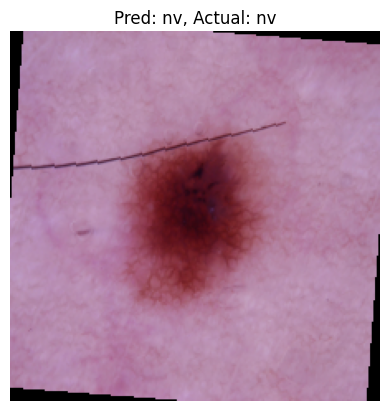

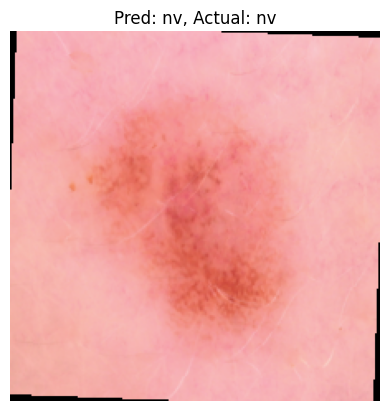

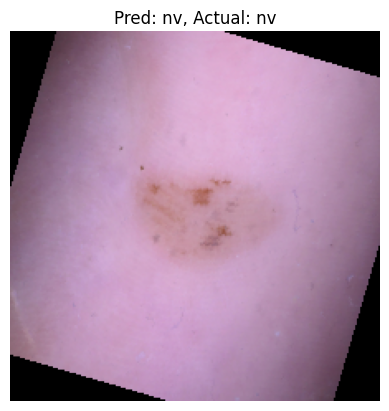

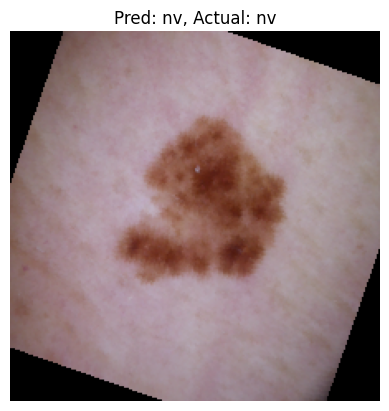

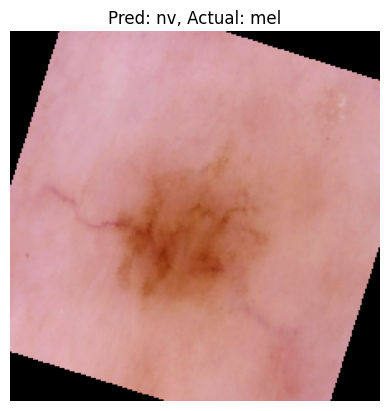

In [ ]:
show_predictions(model, val_loader, n=5)